In [1]:
import sys
import requests #package for http requests
import bs4 # package for html parsing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import date
import seaborn as sns

pd.set_option('display.max_rows', 5000)

In [12]:
#f1data = pd.read_csv('C:\\Users\\ashto\\Desktop\\INFO Phase III Data.csv')
glink = 'https://drive.google.com/file/d/18j3jl3ufYyoRmJjg28Z3FzQDj2W355Jj/view?usp=sharing'
link ='https://drive.google.com/uc?id=' + glink.split('/')[-2]
f1data= pd.read_csv(link)
f1data = f1data[['Driver','Car','Laps','Time/Retired','PTS','Starting Position','Ending Position','Year','Positions Gained','Salary','Cost per Point']]
f1data.head()

,Driver,Car,Laps,Time/Retired,PTS,Starting Position,Ending Position,Year,Positions Gained,Salary,Cost per Point
0,Sebastian Vettel,Red Bull Racing Renault,58.0,1:29:30.259,25.0,1.0,1,2011,0,9280000,371200.000000
1,Sebastian Vettel,Red Bull Racing Renault,56.0,1:37:39.832,25.0,1.0,1,2011,0,9280000,371200.000000
2,Sebastian Vettel,Red Bull Racing Renault,56.0,+5.198s,18.0,1.0,2,2011,-1,9280000,515555.555556
3,Sebastian Vettel,Red Bull Racing Renault,58.0,1:30:17.558,25.0,1.0,1,2011,0,9280000,371200.000000
4,Sebastian Vettel,Red Bull Racing Renault,66.0,1:39:03.301,25.0,2.0,1,2011,1,9280000,371200.000000


In [13]:
#Multiple regression salary with car to predict points
list_of_cars = set(f1data['Car'])
list_of_cars

#need to change car column so 1 if expensive car, 0 if not 
dictcar = {'Alfa Romeo Racing Ferrari':1,
 'AlphaTauri Honda':0,
 'Alpine Renault':0,
 'Aston Martin Mercedes':1,
 'Ferrari':1,
 'Force India Mercedes':0,
 'Haas Ferrari':0,
 'Lotus Renault':0,
 'McLaren Honda':0,
 'McLaren Mercedes':0,
 'McLaren Renault':0,
 'Mercedes':1,
 'Racing Point BWT Mercedes':0,
 'Red Bull Racing Honda':1,
 'Red Bull Racing Renault':1,
 'Red Bull Racing TAG Heuer':1,
 'Renault':1,
 'STR Ferrari':0,
 'Sauber Ferrari':0,
 'Scuderia Toro Rosso Honda':0,
 'Toro Rosso Ferrari':0,
 'Williams Cosworth':0,
 'Williams Mercedes':0,
 'Williams Renault':0}

f1data['Mapped Car Value']= f1data['Car'].map(dictcar)
f1data.head()

#team spending on cars: https://beyondtheflag.com/2019/11/06/formula-1-current-team-budgets-175m-cap-impending/

,Driver,Car,Laps,Time/Retired,PTS,Starting Position,Ending Position,Year,Positions Gained,Salary,Cost per Point,Mapped Car Value
0,Sebastian Vettel,Red Bull Racing Renault,58.0,1:29:30.259,25.0,1.0,1,2011,0,9280000,371200.000000,1
1,Sebastian Vettel,Red Bull Racing Renault,56.0,1:37:39.832,25.0,1.0,1,2011,0,9280000,371200.000000,1
2,Sebastian Vettel,Red Bull Racing Renault,56.0,+5.198s,18.0,1.0,2,2011,-1,9280000,515555.555556,1
3,Sebastian Vettel,Red Bull Racing Renault,58.0,1:30:17.558,25.0,1.0,1,2011,0,9280000,371200.000000,1
4,Sebastian Vettel,Red Bull Racing Renault,66.0,1:39:03.301,25.0,2.0,1,2011,1,9280000,371200.000000,1


Multiple Regression:
Coefficeint: [5.81902076e+00 1.32584573e-07]
Intercept: 4.49
Correlation (r): 0.38


Linear Regression:
Coefficeint: [1.85707083e-07]
Intercept: 7.21
Correlation (r): 0.24


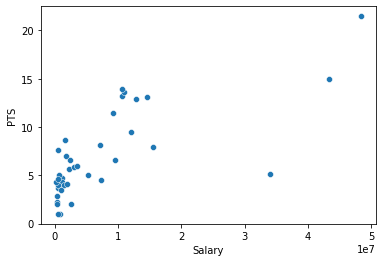

In [14]:
x= f1data[['Mapped Car Value', 'Salary']]
y=f1data['PTS']

regressor = LinearRegression()
regressor.fit(x,y)
ypred = regressor.predict(f1data[['Mapped Car Value', 'Salary']])


plt.show()
print("Multiple Regression:")
print("Coefficeint:",regressor.coef_)
print("Intercept:",round(regressor.intercept_,2))
print("Correlation (r):", round(regressor.score(x,y),2))


x1= f1data[['Salary']]
y1=f1data['PTS']
regressor1 = LinearRegression()
regressor1.fit(x1,y1)
ypred1 = regressor1.predict(f1data[['Salary']])


print("\n")
print("Linear Regression:")
print("Coefficeint:",regressor1.coef_)
print("Intercept:",round(regressor1.intercept_,2))
print("Correlation (r):", round(regressor1.score(x1,y1),2))

#plot
ff1data=f1data.groupby('Driver').mean()
sx = ff1data['Salary']
sy=ff1data['PTS']
sns.scatterplot(x=sx,y=sy,data=ff1data)
plt.show()

In [15]:
#create end graph with 45 degree angle that is predicted value on x and actual on y to see underperform and overperform

In [16]:
#linear regression
def actual_performance(Driver,Year):
    driver = f1data[(f1data['Driver']==Driver)&(f1data['Year']==Year)]
    driver = driver.groupby('Driver').mean()
    driver['Salary'] = driver['Salary'].astype(int)
    return driver

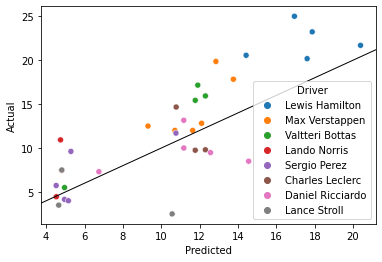

In [17]:
drivers = ['Lewis Hamilton','Max Verstappen','Valtteri Bottas','Lando Norris','Sergio Perez',
           'Charles Leclerc','Daniel Ricciardo','Carlos Sainz','Lance Stroll']
years = [2021,2020,2019,2018,2017,2016]

regression = pd.DataFrame()
for driver in drivers:
    for year in years:
        regression = regression.append(actual_performance(driver,year))
regression = regression.dropna()
regression

performance_list = pd.DataFrame()
for index, row in regression.iterrows():
    intermediate = pd.DataFrame()
    x= row['Mapped Car Value']
    y= row['Salary']
    predicted_performance = regressor.predict([[x,y]])
    actual = actual_performance(index,row['Year'])['PTS']
    intermediate['Actual'] = actual
    intermediate['Predicted']=predicted_performance
    intermediate['Score']=actual/predicted_performance
    intermediate['Driver'] = str(index)
    performance_list = performance_list.append(intermediate,ignore_index=True)
    
performance_list.head()
#plot results
x=performance_list['Predicted']
y=performance_list['Actual']
sns.scatterplot(x=x,y=y,hue='Driver',data=performance_list)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=1, scalex=False, scaley=False)
plt.show()

In [18]:
performance_list.sort_values(['Score'], inplace=True,ascending=False)
performance_list

,Actual,Predicted,Score,Driver
15,10.925926,4.745095,2.302573,Lando Norris
19,9.615385,5.286703,1.818787,Sergio Perez
33,7.500000,4.809399,1.559446,Lance Stroll
16,7.461538,4.809399,1.551449,Lando Norris
5,19.854167,12.846559,1.545485,Max Verstappen
3,25.000000,16.939445,1.475845,Lewis Hamilton
13,17.157895,11.901231,1.441691,Valtteri Bottas
4,20.555556,14.420338,1.425456,Lewis Hamilton
25,14.666667,10.774263,1.361269,Charles Leclerc
10,12.500000,9.305330,1.343316,Max Verstappen


In [19]:
new_list = performance_list.copy()
new_list['Adjusted PTS'] = new_list['Score']*new_list['Actual']
by_driver = new_list.groupby('Driver').mean()
by_driver.sort_values(['Adjusted PTS'],inplace=True,ascending=False)
by_driver

,Actual,Predicted,Score,Adjusted PTS
Driver,,,,
Lewis Hamilton,22.127671,17.443267,1.282168,28.513879
Max Verstappen,14.501195,11.725574,1.232746,18.332979
Valtteri Bottas,13.503759,10.231026,1.289432,17.924253
Lando Norris,7.614003,4.693387,1.612769,13.706159
Charles Leclerc,11.405556,11.613965,0.995518,11.950552
Daniel Ricciardo,9.740374,11.229710,0.898242,8.904355
Sergio Perez,7.039063,6.135486,1.157644,8.810848
Lance Stroll,4.500000,6.674604,0.849579,4.973905


In [20]:
#do all this with positions gained / lost